<a href="https://colab.research.google.com/github/mariammur/CS4410/blob/main/Discussion_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from textblob import TextBlob
import nltk
import numpy as np 
import pandas as pd 
import seaborn as sns
import random
import re


In [2]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [3]:
!pip install requests
import requests
target_url ='https://www.nbcnews.com/news/world/live-blog/russia-ukraine-war-live-updates-zelenskyy-meet-g7-leaders-azovstal-res-rcna27814'
response = requests.get(target_url)
text = response.text

In [4]:
import nltk


In [5]:
blob=TextBlob(text)
blob

TextBlob("<!DOCTYPE html><html lang="en"><head><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="preload" as="style"/><style>@font-face{font-family:iconfont;src:url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.17f6dcc97d.woff2)format("woff2"),url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.5950e1148d.woff)format("woff");font-display:swap;}</style><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="stylesheet"/><link href="https://nodeassets.nbcnews.com/assets/header-footer/1.90.0/news/header.css" rel="stylesheet"/><script>var _HFS = { version: "1.90.0", host: "https://nodeassets.nbcnews.com/assets/header-footer", social: "nbcnews", identity: {"appKey":"nbcnewsweb","options":{"enableIframe":true,"enablePopUp":false,"env":"production"}} }</script><link rel="shortcut icon" type="image/x-icon" href="https://nodeassets.nbcnews.com/cdnassets/projects/ramen/favicon/nbcnews/all-ot

In [6]:
blob.sentences

[Sentence("<!DOCTYPE html><html lang="en"><head><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="preload" as="style"/><style>@font-face{font-family:iconfont;src:url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.17f6dcc97d.woff2)format("woff2"),url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.5950e1148d.woff)format("woff");font-display:swap;}</style><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="stylesheet"/><link href="https://nodeassets.nbcnews.com/assets/header-footer/1.90.0/news/header.css" rel="stylesheet"/><script>var _HFS = { version: "1.90.0", host: "https://nodeassets.nbcnews.com/assets/header-footer", social: "nbcnews", identity: {"appKey":"nbcnewsweb","options":{"enableIframe":true,"enablePopUp":false,"env":"production"}} }</script><link rel="shortcut icon" type="image/x-icon" href="https://nodeassets.nbcnews.com/cdnassets/projects/ramen/favicon/nbcnews/all-o

In [7]:
blob.words

WordList(['DOCTYPE', 'html', 'html', 'lang', 'en', 'head', 'link', 'href', 'https', 'nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css', 'rel', 'preload', 'as', 'style', 'style', 'font-face', 'font-family', 'iconfont', 'src', 'url', 'https', 'nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.17f6dcc97d.woff2', 'format', 'woff2', 'url', 'https', 'nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.5950e1148d.woff', 'format', 'woff', 'font-display', 'swap', 'style', 'link', 'href', 'https', 'nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css', 'rel', 'stylesheet', 'link', 'href', 'https', 'nodeassets.nbcnews.com/assets/header-footer/1.90.0/news/header.css', 'rel', 'stylesheet', 'script', 'var', 'HFS', 'version', '1.90.0', 'host', 'https', 'nodeassets.nbcnews.com/assets/header-footer', 'social', 'nbcnews', 'identity', 'appKey', 'nbcnewsweb', 'options', 'enableIframe', 'true', 'enablePopUp', 'false', 'env', 'production', 'script', 'link', 'rel', 'shortcut

In [8]:
blob.tags

[('<', 'NN'),
 ('DOCTYPE', 'NNP'),
 ('html', 'NN'),
 ('>', 'NNP'),
 ('<', 'NNP'),
 ('html', 'NN'),
 ('lang=', 'NN'),
 ('en', 'NN'),
 ('>', 'CC'),
 ('<', 'NNP'),
 ('head', 'VBP'),
 ('>', 'NNP'),
 ('<', 'NNP'),
 ('link', 'VBP'),
 ('href=', 'NN'),
 ('https', 'NN'),
 ('//nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css', 'NN'),
 ('rel=', 'NN'),
 ('preload', 'NN'),
 ('as=', 'NN'),
 ('style', 'NN'),
 ('/', 'CC'),
 ('>', 'JJ'),
 ('<', 'NNP'),
 ('style', 'NN'),
 ('>', 'NNP'),
 ('@', 'NNP'),
 ('font-face', 'JJ'),
 ('font-family', 'JJ'),
 ('iconfont', 'NN'),
 ('src', 'NN'),
 ('url', 'NN'),
 ('https', 'NN'),
 ('//nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.17f6dcc97d.woff2',
  'NN'),
 ('format', 'NN'),
 ('woff2', 'NN'),
 ('url', 'JJ'),
 ('https', 'NN'),
 ('//nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.5950e1148d.woff',
  'NN'),
 ('format', 'NN'),
 ('woff', 'NN'),
 ('font-display', 'NN'),
 ('swap', 'NN'),
 ('<', 'FW'),
 ('/style', 'JJ'),
 ('>', 'NNP'),
 ('<'

In [9]:
%precision 3


'%.3f'

In [10]:
blob.sentiment.polarity


-0.291

In [11]:
blob.sentiment


Sentiment(polarity=-0.29085307799220267, subjectivity=0.6915066232586276)

In [12]:
blob.sentiment.subjectivity


0.692

In [13]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=-0.47554112554112554, subjectivity=0.7233333333333332)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=-0.08333333333333333, subjectivity=0.7166666666666667)
Sentiment(polarity=0.35, subjectivity=0.55)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=-0.47107438016528924, subjectivity=0.6772727272727274)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.48214285714285715, subjectivity=0.6785714285714286)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.162

In [14]:
sentences = re.compile('[.!?] ').split(text)

In [15]:
sentences

['<!DOCTYPE html><html lang="en"><head><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="preload" as="style"/><style>@font-face{font-family:iconfont;src:url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.17f6dcc97d.woff2)format("woff2"),url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.5950e1148d.woff)format("woff");font-display:swap;}</style><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="stylesheet"/><link href="https://nodeassets.nbcnews.com/assets/header-footer/1.90.0/news/header.css" rel="stylesheet"/><script>var _HFS = { version: "1.90.0", host: "https://nodeassets.nbcnews.com/assets/header-footer", social: "nbcnews", identity: {"appKey":"nbcnewsweb","options":{"enableIframe":true,"enablePopUp":false,"env":"production"}} }</script><link rel="shortcut icon" type="image/x-icon" href="https://nodeassets.nbcnews.com/cdnassets/projects/ramen/favicon/nbcnews/all-other-size

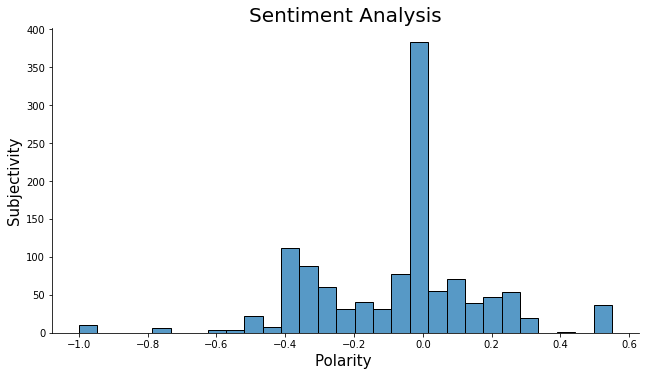

In [16]:
t_sentiment=[]
plt.rcParams['figure.figsize'] = [10, 8]
for s in sentences:
    txt= TextBlob(s)
    x= txt.sentiment.polarity
    y= txt.sentiment.subjectivity
    t_sentiment.append([s,x,y])
df_textblob = pd.DataFrame(t_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])


sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Polarity ', fontsize=15)
plt.ylabel('Subjectivity', fontsize=15)


plt.show()